This notebook provides a set of functions and scripts to process and manipulate DeepLabCut (DLC) data taken from UvA for mouse tracking. The notebook includes transformations to make the dataset more suitable for downstream analyses.

Installation
Make sure to install the required packages by running the following commands:
pip install umap-learn
pip install Pillow==5.3.0
pip install matplotlib==3.7.1

Usage
The notebook consists of cells, each serving a specific purpose. Follow the instructions below:

One Mice Example: This is an example cell to give insight how the notebook works, how datasets are created on one example mice. 

Original Dataset Processing: Load the original DLC dataset for a specific mouse, visualize it, and save it to a CSV file.
Mouse-Centric Coordinates: Transform the dataset to be centered around a reference point (S1). Visualize and save the transformed data.
Mouse-Centric Polar Coordinates: Convert the centered coordinates to polar coordinates. Visualize and save the transformed data.
Mouse-Directional Coordinates: Rotate the coordinates based on the orientation of a reference point (S2). Visualize and save the transformed data.
Mouse-Directional Polar Coordinates: Convert the rotated coordinates to polar coordinates. Visualize and save the transformed data.

Automated Dataset Creation: Use functions to downsample, transform, and save the processed datasets for all mice.

Combine Datasets for All Mice: Combine the processed datasets for each transformation type into a single CSV file per transformation.

Function Descriptions
Downsampler: Downsample the original dataset, either randomly or by keeping a specified percentage of rows.
Transformer: Transform the dataset to be centered around a reference point (S1).
PolarTransformer: Convert Cartesian coordinates to polar coordinates.
Rotator: Rotate the coordinates based on the orientation of a reference point (S2).
Checker: Visualize and check the processed data for a specific frame.


Note
Make sure to customize the paths and filenames as needed.
Ensure that the necessary libraries and packages are installed before running the toolkit.
The toolkit is designed for DLC data specific to mouse tracking.
The Checker function helps visualize the processed data for verification.

In [1]:
# !pip install umap-learn
# !pip install Pillow==5.3.0
# !pip install matplotlib==3.7.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
%matplotlib inline

One Mice Example 

In [16]:
# main_folder = "/Users/gamzekantar/Desktop/ELS_Gamze/v2/DLC_Data" #DLC DATA
main_folder = "Z:/Thesis_data/Data/filtered" #DLC DATA

In [17]:
# Create a folder for every mouse in the folder DatasetsPerMice
for file in os.listdir(main_folder):
    mouse=file.split("_")[1]+"."+file.split("_")[2][0:-3]
    path=f"DatasetsPerMice/{mouse}"
    if not os.path.exists(path):
        os.makedirs(path)
    file=os.path.join(main_folder, file)
    break
print("mouse:",mouse, "Input:",file, "Output:", path)

mouse: 11.4 Input: Z:/Thesis_data/Data/filtered\Animal_11_4DLC_resnet50_Freezing_07-2020Sep29shuffle1_100000filtered.csv Output: DatasetsPerMice/11.4


In [25]:
df = pd.read_csv('C:/Users/Kieran/Documents/Master Thesis Data/v2/v2/DatasetsPerMice/2.4/Original_data.csv')
df

,frame_number,"('nose', 'x')","('nose', 'y')","('nose', 'likelihood')","('H1R', 'x')","('H1R', 'y')","('H1R', 'likelihood')","('H2R', 'x')","('H2R', 'y')","('H2R', 'likelihood')",...,"('tail', 'x')","('tail', 'y')","('tail', 'likelihood')","('S2', 'x')","('S2', 'y')","('S2', 'likelihood')","('S1', 'x')","('S1', 'y')","('S1', 'likelihood')",mouse_no
0,0,655.465454,596.169556,0.375685,1.441294,569.380432,0.672269,1.100614,536.281982,0.150927,...,653.435913,374.538391,0.926555,648.882812,442.020569,0.960436,673.570740,463.700592,0.986622,2.4
1,1,655.465454,598.723022,0.137304,653.664246,573.473999,0.127421,630.188904,546.845093,0.087558,...,656.039673,381.053955,0.720367,652.826843,442.020569,0.975218,675.550964,463.700592,0.988386,2.4
2,2,655.465454,598.850098,0.141754,653.664246,573.473999,0.189718,655.954224,546.845093,0.132388,...,656.039673,410.980377,0.730994,653.333252,442.020569,0.988719,675.550964,463.700592,0.991137,2.4
3,3,655.034790,599.351257,0.328517,1.797714,569.380432,0.105963,655.954224,536.281982,0.118531,...,656.039673,410.980377,0.651599,653.333252,433.984344,0.964876,675.550964,459.856781,0.996633,2.4
4,4,655.034790,598.850098,0.093978,653.664246,569.278564,0.098178,655.954224,515.741516,0.097626,...,649.143372,410.980377,0.694267,652.826843,433.482178,0.947889,674.733032,454.161774,0.993485,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,172.412689,492.601685,0.980347,161.639145,491.723602,0.962631,158.205261,483.657898,0.995811,...,106.437271,344.952820,0.175626,188.598572,399.736053,0.837555,148.013779,398.291473,0.784131,2.4
11246,11246,158.804474,496.747742,0.966895,151.414688,493.952057,0.901850,147.500107,488.071167,0.989264,...,152.058899,344.952820,0.511682,188.598572,400.137146,0.830551,148.013779,398.291473,0.955154,2.4
11247,11247,158.229584,499.269562,0.884514,146.388336,495.241730,0.989397,146.350800,487.560333,0.999033,...,163.117462,364.305450,0.365775,188.401077,399.936371,0.862037,149.812454,404.461731,0.975054,2.4
11248,11248,158.204834,499.269562,0.810430,145.989441,495.241730,0.979529,144.811569,487.560333,0.997931,...,163.117462,364.305450,0.596857,188.401077,399.936371,0.761463,149.812454,404.461731,0.990626,2.4


In [21]:
df = pd.read_csv('C:/Users/Kieran/Documents/Master Thesis Data/Deeplabcut/csv/Animal 2_4DLC_resnet50_Freezing_07-2020Sep29shuffle1_100000.csv',header=[1,2])
df.head(12)

bodyparts        nose                                H1R              \
      coords           x           y likelihood           x           y   
0          0  702.521606  596.169556   0.375685  683.762817  576.073914   
1          1  655.773987  600.520203   0.137304    1.441294  569.380432   
2          2  655.465454  598.723022   0.141754  693.418579  573.473999   
3          3  655.034790  599.351257   0.328517  653.664246  596.039368   
4          4  650.853394  598.850098   0.093978    1.797714  569.237183   
5          5  649.115479  600.743652   0.095145    1.678238  569.278564   
6          6  724.959717  544.255432   0.159281  693.993652  537.900146   
7          7  754.667175  499.476471   0.923447  738.828064  504.977295   
8          8  764.964355  467.729706   0.993381  739.367676  476.060669   
9          9  772.330566  428.003754   0.919299  669.483093  466.228424   
10        10  778.518311  413.608643   0.582102  645.082886  357.598389   
11        11  677.574219  464.621887   0.591319  668.788635  463.537323   

                      H2R                         ...        B3L        tail  \
   likelihood           x           y likelihood  ... likelihood           x   
0    0.672269  630.188904  546.845093   0.150927  ...   0.893027  653.435913   
1    0.127421    1.100614  570.112915   0.087558  ...   0.794425  656.039673   
2    0.189718  676.555542  536.281982   0.132388  ...   0.711920  670.328857   
3    0.105963  655.954224  595.207458   0.118531  ...   0.876383  672.484497   
4    0.098178  717.153687  498.123108   0.097626  ...   0.665015  616.152527   
5    0.117784  635.234741  502.478027   0.078233  ...   0.956627  649.143372   
6    0.414138  647.790039  515.741516   0.434994  ...   0.978441  633.206116   
7    0.983096  727.459839  505.218384   0.678595  ...   0.965873  625.539612   
8    0.990173  710.529602  472.572205   0.871983  ...   0.985830  622.119934   
9    0.896918  678.811157  464.454041   0.786033  ...   0.992943  616.518555   
10   0.792949  673.390564  463.982635   0.387144  ...   0.908368  616.209290   
11   0.699904  649.333984  357.070984   0.586480  ...   0.949474  613.899536   

                                   S2                                 S1  \
             y likelihood           x           y likelihood           x   
0   381.053955   0.926555  648.882812  443.746857   0.960436  673.570740   
1   374.538391   0.720367  653.333252  443.012970   0.975218  675.550964   
2   589.681641   0.730994  652.826843  442.020569   0.988719  676.888794   
3   589.182800   0.651599  657.363831  433.482178   0.964876  677.548462   
4   410.980377   0.694267  653.487061  433.984344   0.947889  674.733032   
5   359.314819   0.894173  647.777161  428.362000   0.989695  671.320984   
6   353.673462   0.955592  639.253784  396.909058   0.993188  659.834534   
7   344.763550   0.982928  631.470032  392.954742   0.998866  649.333008   
8   346.607880   0.996134  632.097839  388.296448   0.998739  653.309631   
9   351.592804   0.992624  630.286072  388.195923   0.982465  667.024963   
10  350.997009   0.817558  625.519653  393.978516   0.952114  641.580566   
11  349.806152   0.920881  621.826843  388.289001   0.926660  640.844482   

                           
             y likelihood  
0   468.210327   0.986622  
1   466.412231   0.988386  
2   463.700592   0.991137  
3   459.856781   0.996633  
4   454.161774   0.993485  
5   449.282532   0.970408  
6   434.815155   0.995961  
7   414.313538   0.993927  
8   411.694946   0.988226  
9   412.342255   0.960615  
10  416.923370   0.991977  
11  411.892426   0.992645  

[12 rows x 43 columns]

In [22]:
df = pd.read_csv('C:/Users/Kieran/Documents/Master Thesis Data/Deeplabcut/csv/Animal 2_4DLC_resnet50_Freezing_07-2020Sep29shuffle1_100000filtered.csv',header=[1,2])
df.head(12)

bodyparts        nose                                H1R              \
      coords           x           y likelihood           x           y   
0          0  655.465454  596.169556   0.375685    1.441294  569.380432   
1          1  655.465454  598.723022   0.137304  653.664246  573.473999   
2          2  655.465454  598.850098   0.141754  653.664246  573.473999   
3          3  655.034790  599.351257   0.328517    1.797714  569.380432   
4          4  655.034790  598.850098   0.093978  653.664246  569.278564   
5          5  655.034790  598.850098   0.095145  653.664246  569.237183   
6          6  724.959717  544.255432   0.159281  693.993652  537.900146   
7          7  754.667175  499.476471   0.923447  693.993652  504.977295   
8          8  764.964355  467.729706   0.993381  693.993652  476.060669   
9          9  764.964355  464.621887   0.919299  669.483093  466.228424   
10        10  772.330566  428.003754   0.582102  668.788635  463.537323   
11        11  778.518311  413.608643   0.591319  645.082886  357.598389   

                      H2R                         ...        B3L        tail  \
   likelihood           x           y likelihood  ... likelihood           x   
0    0.672269    1.100614  536.281982   0.150927  ...   0.893027  653.435913   
1    0.127421  630.188904  546.845093   0.087558  ...   0.794425  656.039673   
2    0.189718  655.954224  546.845093   0.132388  ...   0.711920  656.039673   
3    0.105963  655.954224  536.281982   0.118531  ...   0.876383  656.039673   
4    0.098178  655.954224  515.741516   0.097626  ...   0.665015  649.143372   
5    0.117784  655.954224  505.218384   0.078233  ...   0.956627  633.206116   
6    0.414138  710.529602  502.478027   0.434994  ...   0.978441  625.539612   
7    0.983096  678.811157  502.478027   0.678595  ...   0.965873  625.539612   
8    0.990173  678.811157  472.572205   0.871983  ...   0.985830  622.119934   
9    0.896918  678.811157  464.454041   0.786033  ...   0.992943  616.518555   
10   0.792949  673.390564  463.982635   0.387144  ...   0.908368  616.518555   
11   0.699904  651.729553  357.680573   0.586480  ...   0.949474  616.518555   

                                   S2                                 S1  \
             y likelihood           x           y likelihood           x   
0   374.538391   0.926555  648.882812  442.020569   0.960436  673.570740   
1   381.053955   0.720367  652.826843  442.020569   0.975218  675.550964   
2   410.980377   0.730994  653.333252  442.020569   0.988719  675.550964   
3   410.980377   0.651599  653.333252  433.984344   0.964876  675.550964   
4   410.980377   0.694267  652.826843  433.482178   0.947889  674.733032   
5   359.314819   0.894173  647.777161  428.362000   0.989695  671.320984   
6   353.673462   0.955592  639.253784  396.909058   0.993188  659.834534   
7   351.592804   0.982928  632.097839  392.954742   0.998866  659.834534   
8   350.997009   0.996134  631.470032  392.954742   0.998739  653.309631   
9   349.806152   0.992624  630.286072  388.296448   0.982465  649.333008   
10  350.997009   0.817558  625.519653  388.289001   0.952114  641.580566   
11  351.592804   0.920881  622.788147  388.289001   0.926660  641.580566   

                           
             y likelihood  
0   463.700592   0.986622  
1   463.700592   0.988386  
2   463.700592   0.991137  
3   459.856781   0.996633  
4   454.161774   0.993485  
5   449.282532   0.970408  
6   434.815155   0.995961  
7   414.313538   0.993927  
8   414.313538   0.988226  
9   412.342255   0.960615  
10  411.892426   0.991977  
11  412.342255   0.992645  

[12 rows x 43 columns]

In [18]:
df = pd.read_csv(file,header=[1,2])
df

bodyparts        nose                                H1R              \
         coords           x           y likelihood           x           y   
0             0  389.652130  391.121582   0.999969  368.418610  395.140015   
1             1  390.096405  393.142700   0.999950  368.954803  397.121368   
2             2  390.536285  397.035248   0.999945  369.900299  400.646271   
3             3  398.239349  397.035248   0.999765  375.819672  400.646271   
4             4  415.408661  397.035248   0.999855  396.818848  400.646271   
...         ...         ...         ...        ...         ...         ...   
11245     11245  364.107910  149.601181   0.998303  344.420105  150.693054   
11246     11246  375.265228  128.008606   0.997676  351.077271  137.533630   
11247     11247  377.197815  117.285118   0.999162  355.023926  131.847992   
11248     11248  377.197815  113.858429   0.999720  355.023926  122.189278   
11249     11249  377.197815  111.635361   0.999381  355.023926  117.274345   

                         H2R                         ...        B3L  \
      likelihood           x           y likelihood  ... likelihood   
0       0.999760  346.555359  395.608948   0.996968  ...   0.999813   
1       0.999568  351.003540  399.964783   0.997916  ...   0.999804   
2       0.999638  352.932281  400.691162   0.999153  ...   0.999615   
3       0.999534  357.683594  400.691162   0.999468  ...   0.999619   
4       0.999252  374.967102  400.691162   0.998945  ...   0.999691   
...          ...         ...         ...        ...  ...        ...   
11245   0.999295  323.575958  153.616699   0.992387  ...   0.942903   
11246   0.993547  324.854950  142.170212   0.986537  ...   0.939583   
11247   0.986025  325.591003  140.211060   0.933739  ...   0.935722   
11248   0.990261  325.591003  135.173889   0.938426  ...   0.921258   
11249   0.992125  325.591003  125.583832   0.967439  ...   0.953398   

             tail                                 S2                         \
                x           y likelihood           x           y likelihood   
0      197.399582  219.079468   0.998689  247.088928  281.114136   0.994912   
1      199.069702  219.292374   0.999059  247.683929  281.190613   0.996069   
2      199.867844  220.684891   0.999419  250.365112  281.190613   0.986211   
3      201.723312  222.606628   0.999285  253.343109  281.232605   0.981083   
4      201.723312  227.533890   0.999156  253.343109  281.232605   0.983985   
...           ...         ...        ...         ...         ...        ...   
11245  115.261879  109.120758   0.997492  191.435760  106.898674   0.979662   
11246  115.261879  109.938370   0.999370  188.565491  107.834068   0.977227   
11247  115.261879  110.734329   0.999556  188.239838  111.964462   0.975709   
11248  115.261879  110.734329   0.999567  187.286819  111.964462   0.974826   
11249  115.261879  110.734329   0.999485  187.286819  111.964462   0.977246   

               S1                         
                x           y likelihood  
0      292.150818  318.674744   0.995648  
1      295.781158  321.270813   0.993003  
2      299.371765  323.419800   0.987800  
3      303.137299  326.057861   0.994152  
4      304.960480  326.125854   0.995609  
...           ...         ...        ...  
11245  230.204132  108.960442   0.977986  
11246  230.204132  109.485367   0.980468  
11247  230.204132  110.523743   0.985897  
11248  226.513855  110.523743   0.992293  
11249  226.513855  110.523743   0.993469  

[11250 rows x 43 columns]

Original Dataset

In [177]:
df.columns = ['frame_number'] + list(df.columns[1:])
df['mouse_no']=mouse
df.to_csv(f'{path}/Original_data.csv', index=False)
df

,frame_number,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)",...,"(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)",mouse_no
0,0,389.652130,391.121582,0.999969,368.418610,395.140015,0.999760,346.555359,395.608948,0.996968,...,197.399582,219.079468,0.998689,247.088928,281.114136,0.994912,292.150818,318.674744,0.995648,11.4
1,1,390.096405,393.142700,0.999950,368.954803,397.121368,0.999568,351.003540,399.964783,0.997916,...,199.069702,219.292374,0.999059,247.683929,281.190613,0.996069,295.781158,321.270813,0.993003,11.4
2,2,390.536285,397.035248,0.999945,369.900299,400.646271,0.999638,352.932281,400.691162,0.999153,...,199.867844,220.684891,0.999419,250.365112,281.190613,0.986211,299.371765,323.419800,0.987800,11.4
3,3,398.239349,397.035248,0.999765,375.819672,400.646271,0.999534,357.683594,400.691162,0.999468,...,201.723312,222.606628,0.999285,253.343109,281.232605,0.981083,303.137299,326.057861,0.994152,11.4
4,4,415.408661,397.035248,0.999855,396.818848,400.646271,0.999252,374.967102,400.691162,0.998945,...,201.723312,227.533890,0.999156,253.343109,281.232605,0.983985,304.960480,326.125854,0.995609,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,364.107910,149.601181,0.998303,344.420105,150.693054,0.999295,323.575958,153.616699,0.992387,...,115.261879,109.120758,0.997492,191.435760,106.898674,0.979662,230.204132,108.960442,0.977986,11.4
11246,11246,375.265228,128.008606,0.997676,351.077271,137.533630,0.993547,324.854950,142.170212,0.986537,...,115.261879,109.938370,0.999370,188.565491,107.834068,0.977227,230.204132,109.485367,0.980468,11.4
11247,11247,377.197815,117.285118,0.999162,355.023926,131.847992,0.986025,325.591003,140.211060,0.933739,...,115.261879,110.734329,0.999556,188.239838,111.964462,0.975709,230.204132,110.523743,0.985897,11.4
11248,11248,377.197815,113.858429,0.999720,355.023926,122.189278,0.990261,325.591003,135.173889,0.938426,...,115.261879,110.734329,0.999567,187.286819,111.964462,0.974826,226.513855,110.523743,0.992293,11.4


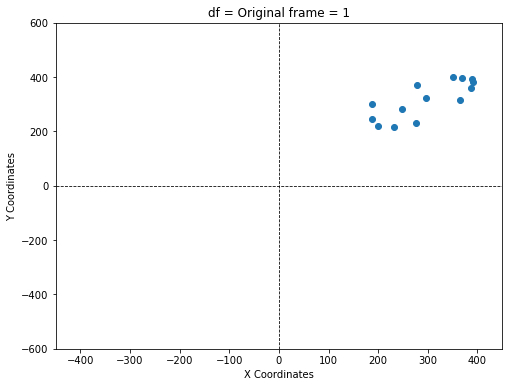

In [178]:
frame =1
x_coord = df.iloc[frame, 1:-1:3]
y_coord = df.iloc[frame, 2:-1:3]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.show()

Mouse Centric

In [197]:
mc_df= df.copy()
mc_df = mc_df.iloc[:, 1:-1] #exclude frame number and mouse number
mc_df = mc_df.astype(float) 
mc_df

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,389.652130,391.121582,0.999969,368.418610,395.140015,0.999760,346.555359,395.608948,0.996968,391.455475,...,0.999813,197.399582,219.079468,0.998689,247.088928,281.114136,0.994912,292.150818,318.674744,0.995648
1,390.096405,393.142700,0.999950,368.954803,397.121368,0.999568,351.003540,399.964783,0.997916,391.991150,...,0.999804,199.069702,219.292374,0.999059,247.683929,281.190613,0.996069,295.781158,321.270813,0.993003
2,390.536285,397.035248,0.999945,369.900299,400.646271,0.999638,352.932281,400.691162,0.999153,392.961304,...,0.999615,199.867844,220.684891,0.999419,250.365112,281.190613,0.986211,299.371765,323.419800,0.987800
3,398.239349,397.035248,0.999765,375.819672,400.646271,0.999534,357.683594,400.691162,0.999468,399.517914,...,0.999619,201.723312,222.606628,0.999285,253.343109,281.232605,0.981083,303.137299,326.057861,0.994152
4,415.408661,397.035248,0.999855,396.818848,400.646271,0.999252,374.967102,400.691162,0.998945,413.368073,...,0.999691,201.723312,227.533890,0.999156,253.343109,281.232605,0.983985,304.960480,326.125854,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,364.107910,149.601181,0.998303,344.420105,150.693054,0.999295,323.575958,153.616699,0.992387,361.650970,...,0.942903,115.261879,109.120758,0.997492,191.435760,106.898674,0.979662,230.204132,108.960442,0.977986
11246,375.265228,128.008606,0.997676,351.077271,137.533630,0.993547,324.854950,142.170212,0.986537,365.810822,...,0.939583,115.261879,109.938370,0.999370,188.565491,107.834068,0.977227,230.204132,109.485367,0.980468
11247,377.197815,117.285118,0.999162,355.023926,131.847992,0.986025,325.591003,140.211060,0.933739,367.412567,...,0.935722,115.261879,110.734329,0.999556,188.239838,111.964462,0.975709,230.204132,110.523743,0.985897
11248,377.197815,113.858429,0.999720,355.023926,122.189278,0.990261,325.591003,135.173889,0.938426,367.412567,...,0.921258,115.261879,110.734329,0.999567,187.286819,111.964462,0.974826,226.513855,110.523743,0.992293


In [180]:
# Extract the x, y coordinates for S1
s1_x = mc_df.iloc[:,39].copy()
s1_y = mc_df.iloc[:,40].copy()
s1_x

0        292.150818
1        295.781158
2        299.371765
3        303.137299
4        304.960480
            ...    
11245    230.204132
11246    230.204132
11247    230.204132
11248    226.513855
11249    226.513855
Name: (S1, x), Length: 11250, dtype: float64

In [181]:
for column_index in range(0, len(mc_df.columns), 3):
    column = mc_df.columns[column_index]

    # Extract the x, y coordinates and likelihood for the current body part
    x = mc_df[column]
    y = mc_df[mc_df.columns[column_index+1]]

    # Compute the transformed coordinates relative to S1
    transformed_x = x - s1_x
    transformed_y = y - s1_y

    # Add the transformed coordinates and likelihood to the new DataFrame
    mc_df[column] = transformed_x
    mc_df[mc_df.columns[column_index+1]] = transformed_y

mc_df.iloc[:,39]=s1_x
mc_df.iloc[:,40]=s1_y
mc_df


,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,97.501312,72.446838,0.999969,76.267792,76.465271,0.999760,54.404541,76.934204,0.996968,99.304657,...,0.999813,-94.751236,-99.595276,0.998689,-45.061890,-37.560608,0.994912,292.150818,318.674744,0.995648
1,94.315247,71.871887,0.999950,73.173645,75.850555,0.999568,55.222382,78.693970,0.997916,96.209991,...,0.999804,-96.711456,-101.978439,0.999059,-48.097229,-40.080200,0.996069,295.781158,321.270813,0.993003
2,91.164520,73.615448,0.999945,70.528534,77.226471,0.999638,53.560516,77.271362,0.999153,93.589539,...,0.999615,-99.503922,-102.734909,0.999419,-49.006653,-42.229187,0.986211,299.371765,323.419800,0.987800
3,95.102051,70.977386,0.999765,72.682373,74.588409,0.999534,54.546295,74.633301,0.999468,96.380615,...,0.999619,-101.413986,-103.451233,0.999285,-49.794189,-44.825256,0.981083,303.137299,326.057861,0.994152
4,110.448181,70.909393,0.999855,91.858368,74.520416,0.999252,70.006622,74.565308,0.998945,108.407593,...,0.999691,-103.237167,-98.591965,0.999156,-51.617371,-44.893250,0.983985,304.960480,326.125854,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,133.903778,40.640739,0.998303,114.215973,41.732613,0.999295,93.371826,44.656258,0.992387,131.446838,...,0.942903,-114.942253,0.160316,0.997492,-38.768372,-2.061768,0.979662,230.204132,108.960442,0.977986
11246,145.061096,18.523239,0.997676,120.873138,28.048264,0.993547,94.650818,32.684845,0.986537,135.606689,...,0.939583,-114.942253,0.453003,0.999370,-41.638641,-1.651299,0.977227,230.204132,109.485367,0.980468
11247,146.993683,6.761375,0.999162,124.819794,21.324249,0.986025,95.386871,29.687317,0.933739,137.208435,...,0.935722,-114.942253,0.210587,0.999556,-41.964294,1.440720,0.975709,230.204132,110.523743,0.985897
11248,150.683960,3.334686,0.999720,128.510071,11.665535,0.990261,99.077148,24.650146,0.938426,140.898712,...,0.921258,-111.251976,0.210587,0.999567,-39.227036,1.440720,0.974826,226.513855,110.523743,0.992293


In [182]:
mc_df.insert(0, 'frame_number', df['frame_number'])
mc_df['mouse_no']=mouse
mc_df.to_csv(f'{path}/MouseCentric_data.csv', index=False)


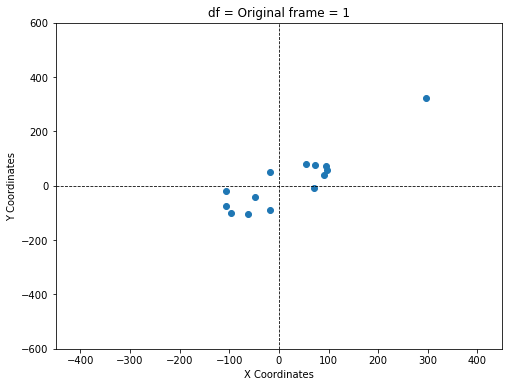

In [183]:
frame =1
x_coord = mc_df.iloc[frame, 1:-1:3]
y_coord = mc_df.iloc[frame, 2:-1:3]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.show()

Mouse Centric Polar

In [184]:
mcp_df=mc_df.copy()
mcp_df=mcp_df.iloc[:,1:-1]
mcp_df

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,97.501312,72.446838,0.999969,76.267792,76.465271,0.999760,54.404541,76.934204,0.996968,99.304657,...,0.999813,-94.751236,-99.595276,0.998689,-45.061890,-37.560608,0.994912,292.150818,318.674744,0.995648
1,94.315247,71.871887,0.999950,73.173645,75.850555,0.999568,55.222382,78.693970,0.997916,96.209991,...,0.999804,-96.711456,-101.978439,0.999059,-48.097229,-40.080200,0.996069,295.781158,321.270813,0.993003
2,91.164520,73.615448,0.999945,70.528534,77.226471,0.999638,53.560516,77.271362,0.999153,93.589539,...,0.999615,-99.503922,-102.734909,0.999419,-49.006653,-42.229187,0.986211,299.371765,323.419800,0.987800
3,95.102051,70.977386,0.999765,72.682373,74.588409,0.999534,54.546295,74.633301,0.999468,96.380615,...,0.999619,-101.413986,-103.451233,0.999285,-49.794189,-44.825256,0.981083,303.137299,326.057861,0.994152
4,110.448181,70.909393,0.999855,91.858368,74.520416,0.999252,70.006622,74.565308,0.998945,108.407593,...,0.999691,-103.237167,-98.591965,0.999156,-51.617371,-44.893250,0.983985,304.960480,326.125854,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,133.903778,40.640739,0.998303,114.215973,41.732613,0.999295,93.371826,44.656258,0.992387,131.446838,...,0.942903,-114.942253,0.160316,0.997492,-38.768372,-2.061768,0.979662,230.204132,108.960442,0.977986
11246,145.061096,18.523239,0.997676,120.873138,28.048264,0.993547,94.650818,32.684845,0.986537,135.606689,...,0.939583,-114.942253,0.453003,0.999370,-41.638641,-1.651299,0.977227,230.204132,109.485367,0.980468
11247,146.993683,6.761375,0.999162,124.819794,21.324249,0.986025,95.386871,29.687317,0.933739,137.208435,...,0.935722,-114.942253,0.210587,0.999556,-41.964294,1.440720,0.975709,230.204132,110.523743,0.985897
11248,150.683960,3.334686,0.999720,128.510071,11.665535,0.990261,99.077148,24.650146,0.938426,140.898712,...,0.921258,-111.251976,0.210587,0.999567,-39.227036,1.440720,0.974826,226.513855,110.523743,0.992293


In [185]:
coordinates_columns = [col for col in mcp_df.columns if col[1].endswith(('x', 'y'))]

# Loop through each coordinate pair (x, y) and apply the rotation to remove orientation
for col_x, col_y in zip(coordinates_columns[::2], coordinates_columns[1::2]):
    x, y = mcp_df[col_x], mcp_df[col_y]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    mcp_df[col_x] = r
    mcp_df[col_y] = theta
mcp_df

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,121.470368,0.639028,0.999969,107.998675,0.786691,0.999760,94.226991,0.955283,0.996968,115.846040,...,0.999813,137.466417,-2.331275,0.998689,58.663218,-2.446736,0.994912,432.325910,0.828794,0.995648
1,118.578809,0.651162,0.999950,105.393022,0.803359,0.999568,96.136633,0.958906,0.997916,112.848917,...,0.999804,140.544327,-2.329692,0.999059,62.608034,-2.446864,0.996069,436.693747,0.826683,0.993003
2,117.175953,0.679298,0.999945,104.585859,0.830699,0.999638,94.019106,0.964684,0.999153,109.612757,...,0.999615,143.022697,-2.340220,0.999419,64.691238,-2.430343,0.986211,440.708317,0.823992,0.987800
3,118.668401,0.641147,0.999765,104.144890,0.798340,0.999534,92.441484,0.939660,0.999468,110.684581,...,0.999619,144.868748,-2.346250,0.999285,66.998246,-2.408661,0.981083,445.203269,0.821810,0.994152
4,131.251449,0.570741,0.999855,118.284624,0.681565,0.999252,102.278601,0.816920,0.998945,121.271033,...,0.999691,142.752542,-2.379206,0.999156,68.408748,-2.425754,0.983985,446.496324,0.818924,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,139.935312,0.294671,0.998303,121.601396,0.350313,0.999295,103.501108,0.446107,0.992387,132.184918,...,0.942903,114.942365,3.140198,0.997492,38.823157,-3.088461,0.979662,254.688673,0.442078,0.977986
11246,146.238955,0.127005,0.997676,124.084732,0.228012,0.993547,100.135291,0.332500,0.986537,135.689696,...,0.939583,114.943146,3.137652,0.999370,41.671372,-3.101956,0.977227,254.913687,0.443939,0.980468
11247,147.149105,0.045965,0.999162,126.628214,0.169207,0.986025,99.899910,0.301728,0.933739,137.664934,...,0.935722,114.942446,3.139761,0.999556,41.989019,3.107274,0.975709,255.361391,0.447611,0.985897
11248,150.720854,0.022127,0.999720,129.038456,0.090527,0.990261,102.097557,0.243847,0.938426,141.641254,...,0.921258,111.252175,3.139700,0.999567,39.253484,3.104881,0.974826,252.039727,0.453948,0.992293


In [186]:
mcp_df.insert(0, 'frame_number', df['frame_number'])
mcp_df['mouse_no']=mouse
mcp_df.to_csv(f'{path}/MouseCentricPolar_data.csv', index=False)
mcp_df

,frame_number,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)",...,"(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)",mouse_no
0,0,121.470368,0.639028,0.999969,107.998675,0.786691,0.999760,94.226991,0.955283,0.996968,...,137.466417,-2.331275,0.998689,58.663218,-2.446736,0.994912,432.325910,0.828794,0.995648,11.4
1,1,118.578809,0.651162,0.999950,105.393022,0.803359,0.999568,96.136633,0.958906,0.997916,...,140.544327,-2.329692,0.999059,62.608034,-2.446864,0.996069,436.693747,0.826683,0.993003,11.4
2,2,117.175953,0.679298,0.999945,104.585859,0.830699,0.999638,94.019106,0.964684,0.999153,...,143.022697,-2.340220,0.999419,64.691238,-2.430343,0.986211,440.708317,0.823992,0.987800,11.4
3,3,118.668401,0.641147,0.999765,104.144890,0.798340,0.999534,92.441484,0.939660,0.999468,...,144.868748,-2.346250,0.999285,66.998246,-2.408661,0.981083,445.203269,0.821810,0.994152,11.4
4,4,131.251449,0.570741,0.999855,118.284624,0.681565,0.999252,102.278601,0.816920,0.998945,...,142.752542,-2.379206,0.999156,68.408748,-2.425754,0.983985,446.496324,0.818924,0.995609,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,139.935312,0.294671,0.998303,121.601396,0.350313,0.999295,103.501108,0.446107,0.992387,...,114.942365,3.140198,0.997492,38.823157,-3.088461,0.979662,254.688673,0.442078,0.977986,11.4
11246,11246,146.238955,0.127005,0.997676,124.084732,0.228012,0.993547,100.135291,0.332500,0.986537,...,114.943146,3.137652,0.999370,41.671372,-3.101956,0.977227,254.913687,0.443939,0.980468,11.4
11247,11247,147.149105,0.045965,0.999162,126.628214,0.169207,0.986025,99.899910,0.301728,0.933739,...,114.942446,3.139761,0.999556,41.989019,3.107274,0.975709,255.361391,0.447611,0.985897,11.4
11248,11248,150.720854,0.022127,0.999720,129.038456,0.090527,0.990261,102.097557,0.243847,0.938426,...,111.252175,3.139700,0.999567,39.253484,3.104881,0.974826,252.039727,0.453948,0.992293,11.4


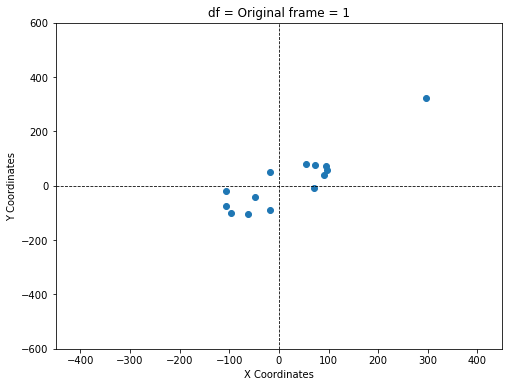

In [187]:
frame =1
r = mcp_df.iloc[frame, 1:-1:3]
theta = mcp_df.iloc[frame, 2:-1:3]
x_coord = r * [math.cos(t) for t in theta]
y_coord = r * [math.sin(t) for t in theta]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.show()

Mouse Directional

In [188]:
md_df=mc_df.copy()
md_df=md_df.iloc[:,1:-1]
md_df

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,97.501312,72.446838,0.999969,76.267792,76.465271,0.999760,54.404541,76.934204,0.996968,99.304657,...,0.999813,-94.751236,-99.595276,0.998689,-45.061890,-37.560608,0.994912,292.150818,318.674744,0.995648
1,94.315247,71.871887,0.999950,73.173645,75.850555,0.999568,55.222382,78.693970,0.997916,96.209991,...,0.999804,-96.711456,-101.978439,0.999059,-48.097229,-40.080200,0.996069,295.781158,321.270813,0.993003
2,91.164520,73.615448,0.999945,70.528534,77.226471,0.999638,53.560516,77.271362,0.999153,93.589539,...,0.999615,-99.503922,-102.734909,0.999419,-49.006653,-42.229187,0.986211,299.371765,323.419800,0.987800
3,95.102051,70.977386,0.999765,72.682373,74.588409,0.999534,54.546295,74.633301,0.999468,96.380615,...,0.999619,-101.413986,-103.451233,0.999285,-49.794189,-44.825256,0.981083,303.137299,326.057861,0.994152
4,110.448181,70.909393,0.999855,91.858368,74.520416,0.999252,70.006622,74.565308,0.998945,108.407593,...,0.999691,-103.237167,-98.591965,0.999156,-51.617371,-44.893250,0.983985,304.960480,326.125854,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,133.903778,40.640739,0.998303,114.215973,41.732613,0.999295,93.371826,44.656258,0.992387,131.446838,...,0.942903,-114.942253,0.160316,0.997492,-38.768372,-2.061768,0.979662,230.204132,108.960442,0.977986
11246,145.061096,18.523239,0.997676,120.873138,28.048264,0.993547,94.650818,32.684845,0.986537,135.606689,...,0.939583,-114.942253,0.453003,0.999370,-41.638641,-1.651299,0.977227,230.204132,109.485367,0.980468
11247,146.993683,6.761375,0.999162,124.819794,21.324249,0.986025,95.386871,29.687317,0.933739,137.208435,...,0.935722,-114.942253,0.210587,0.999556,-41.964294,1.440720,0.975709,230.204132,110.523743,0.985897
11248,150.683960,3.334686,0.999720,128.510071,11.665535,0.990261,99.077148,24.650146,0.938426,140.898712,...,0.921258,-111.251976,0.210587,0.999567,-39.227036,1.440720,0.974826,226.513855,110.523743,0.992293


In [190]:
coordinates_columns = [col for col in md_df.columns if col[1].endswith(('x', 'y'))]

  # Loop through each frame
for frame_number, frame_data_polar in mcp_df.groupby('frame_number'):
    # Find the 'S2' angle for the current frame
    rotation_angle = frame_data_polar.at[frame_data_polar.index[0], ('S2', 'y')]
    # Create the 2x2 affine transformation matrix
    affine_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                              [np.sin(rotation_angle), np.cos(rotation_angle)]])


    # Loop through each limb coordinate and apply the affine transformation
    for col_x, col_y in zip(coordinates_columns[::2], coordinates_columns[1::2]):
      x, y = md_df[col_x], md_df[col_y]
      # Convert the DataFrame column to a NumPy array for matrix multiplication
      points = np.column_stack((x, y))
      # Apply the affine transformation matrix to the points
      transformed_points = np.dot(points[frame_number], affine_matrix)
      # Update the DataFrame with the transformed coordinates
      md_df.at[frame_number, col_x] = transformed_points[0]
      md_df.at[frame_number, col_y] = transformed_points[1]

md_df

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,88.821788,-82.859763,0.999969,88.950462,-61.249727,0.999760,85.474262,-39.659505,0.996968,76.565290,...,0.999813,-115.031051,75.265350,0.998689,-45.061890,3.756061e+01,0.994912,366.079101,-229.982139,0.995648
1,87.702941,-79.806817,0.999950,87.803530,-58.294333,0.999568,87.362850,-40.124614,0.997916,75.363116,...,0.999804,-117.747984,76.734087,0.999059,-48.097229,4.008020e+01,0.996069,369.346376,-232.990738,0.993003
2,86.277450,-79.286856,0.999945,86.799770,-58.343824,0.999638,84.337061,-41.555414,0.999153,70.262986,...,0.999615,-116.309483,83.232181,0.999419,-49.006653,4.222919e+01,0.986211,364.103592,-248.299004,0.987800
3,80.548061,-87.144703,0.999765,81.790962,-64.470122,0.999534,79.936016,-46.429099,0.999468,64.218563,...,0.999619,-113.504405,90.020577,0.999285,-49.794189,4.482526e+01,0.981083,356.015293,-267.318278,0.994152
4,85.540317,-99.547963,0.999855,86.538574,-80.637011,0.999252,83.552816,-58.990162,0.998945,68.862814,...,0.999691,-111.955469,88.567834,0.999156,-51.617371,4.489325e+01,0.983985,365.264307,-256.789707,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,-135.873113,-33.472209,0.998303,-116.271076,-35.608094,0.999295,-95.611608,-39.634576,0.992387,-132.002144,...,0.942903,114.771538,-6.264288,0.997492,38.823157,1.776357e-15,0.979662,-235.665802,-96.581313,0.977986
11246,-145.681173,-12.760399,0.997676,-121.889659,-23.236431,0.993547,-95.871667,-28.908474,0.986537,-135.312131,...,0.939583,114.834021,-5.007428,0.999370,41.671372,0.000000e+00,0.977227,-234.361862,-100.277144,0.980468
11247,-146.675134,-11.801015,0.999162,-124.014623,-25.594487,0.986025,-94.312079,-32.942733,0.933739,-137.511996,...,0.935722,114.881798,3.733415,0.999556,41.989019,-6.661338e-15,0.975709,-226.276312,-118.357386,0.985897
11248,-150.460039,-8.862989,0.999720,-127.995323,-16.374377,0.990261,-98.105658,-28.269964,0.938426,-141.335398,...,0.921258,111.184746,3.872834,0.999567,39.253484,3.330669e-15,0.974826,-222.304684,-118.763006,0.992293


In [191]:
md_df.insert(0, 'frame_number', df['frame_number'])
md_df['mouse_no']=mouse
md_df.to_csv(f'{path}/MousDirectional_data.csv', index=False)
md_df

,frame_number,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)",...,"(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)",mouse_no
0,0,88.821788,-82.859763,0.999969,88.950462,-61.249727,0.999760,85.474262,-39.659505,0.996968,...,-115.031051,75.265350,0.998689,-45.061890,3.756061e+01,0.994912,366.079101,-229.982139,0.995648,11.4
1,1,87.702941,-79.806817,0.999950,87.803530,-58.294333,0.999568,87.362850,-40.124614,0.997916,...,-117.747984,76.734087,0.999059,-48.097229,4.008020e+01,0.996069,369.346376,-232.990738,0.993003,11.4
2,2,86.277450,-79.286856,0.999945,86.799770,-58.343824,0.999638,84.337061,-41.555414,0.999153,...,-116.309483,83.232181,0.999419,-49.006653,4.222919e+01,0.986211,364.103592,-248.299004,0.987800,11.4
3,3,80.548061,-87.144703,0.999765,81.790962,-64.470122,0.999534,79.936016,-46.429099,0.999468,...,-113.504405,90.020577,0.999285,-49.794189,4.482526e+01,0.981083,356.015293,-267.318278,0.994152,11.4
4,4,85.540317,-99.547963,0.999855,86.538574,-80.637011,0.999252,83.552816,-58.990162,0.998945,...,-111.955469,88.567834,0.999156,-51.617371,4.489325e+01,0.983985,365.264307,-256.789707,0.995609,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,-135.873113,-33.472209,0.998303,-116.271076,-35.608094,0.999295,-95.611608,-39.634576,0.992387,...,114.771538,-6.264288,0.997492,38.823157,1.776357e-15,0.979662,-235.665802,-96.581313,0.977986,11.4
11246,11246,-145.681173,-12.760399,0.997676,-121.889659,-23.236431,0.993547,-95.871667,-28.908474,0.986537,...,114.834021,-5.007428,0.999370,41.671372,0.000000e+00,0.977227,-234.361862,-100.277144,0.980468,11.4
11247,11247,-146.675134,-11.801015,0.999162,-124.014623,-25.594487,0.986025,-94.312079,-32.942733,0.933739,...,114.881798,3.733415,0.999556,41.989019,-6.661338e-15,0.975709,-226.276312,-118.357386,0.985897,11.4
11248,11248,-150.460039,-8.862989,0.999720,-127.995323,-16.374377,0.990261,-98.105658,-28.269964,0.938426,...,111.184746,3.872834,0.999567,39.253484,3.330669e-15,0.974826,-222.304684,-118.763006,0.992293,11.4


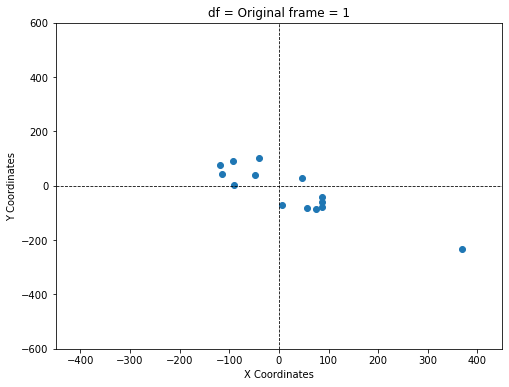

In [192]:
frame =1
x_coord = md_df.iloc[frame, 1:-1:3]
y_coord = md_df.iloc[frame, 2:-1:3]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.show()

Mouse Directional Polar

In [193]:
mdp_df=md_df.copy()
mdp_df=mdp_df.iloc[:,1:-1]
mdp_df 

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,88.821788,-82.859763,0.999969,88.950462,-61.249727,0.999760,85.474262,-39.659505,0.996968,76.565290,...,0.999813,-115.031051,75.265350,0.998689,-45.061890,3.756061e+01,0.994912,366.079101,-229.982139,0.995648
1,87.702941,-79.806817,0.999950,87.803530,-58.294333,0.999568,87.362850,-40.124614,0.997916,75.363116,...,0.999804,-117.747984,76.734087,0.999059,-48.097229,4.008020e+01,0.996069,369.346376,-232.990738,0.993003
2,86.277450,-79.286856,0.999945,86.799770,-58.343824,0.999638,84.337061,-41.555414,0.999153,70.262986,...,0.999615,-116.309483,83.232181,0.999419,-49.006653,4.222919e+01,0.986211,364.103592,-248.299004,0.987800
3,80.548061,-87.144703,0.999765,81.790962,-64.470122,0.999534,79.936016,-46.429099,0.999468,64.218563,...,0.999619,-113.504405,90.020577,0.999285,-49.794189,4.482526e+01,0.981083,356.015293,-267.318278,0.994152
4,85.540317,-99.547963,0.999855,86.538574,-80.637011,0.999252,83.552816,-58.990162,0.998945,68.862814,...,0.999691,-111.955469,88.567834,0.999156,-51.617371,4.489325e+01,0.983985,365.264307,-256.789707,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,-135.873113,-33.472209,0.998303,-116.271076,-35.608094,0.999295,-95.611608,-39.634576,0.992387,-132.002144,...,0.942903,114.771538,-6.264288,0.997492,38.823157,1.776357e-15,0.979662,-235.665802,-96.581313,0.977986
11246,-145.681173,-12.760399,0.997676,-121.889659,-23.236431,0.993547,-95.871667,-28.908474,0.986537,-135.312131,...,0.939583,114.834021,-5.007428,0.999370,41.671372,0.000000e+00,0.977227,-234.361862,-100.277144,0.980468
11247,-146.675134,-11.801015,0.999162,-124.014623,-25.594487,0.986025,-94.312079,-32.942733,0.933739,-137.511996,...,0.935722,114.881798,3.733415,0.999556,41.989019,-6.661338e-15,0.975709,-226.276312,-118.357386,0.985897
11248,-150.460039,-8.862989,0.999720,-127.995323,-16.374377,0.990261,-98.105658,-28.269964,0.938426,-141.335398,...,0.921258,111.184746,3.872834,0.999567,39.253484,3.330669e-15,0.974826,-222.304684,-118.763006,0.992293


In [194]:
coordinates_columns = [col for col in mdp_df.columns if col[1].endswith(('x', 'y'))]

# Loop through each coordinate pair (x, y) and apply the rotation to remove orientation
for col_x, col_y in zip(coordinates_columns[::2], coordinates_columns[1::2]):
    x, y = mdp_df[col_x], mdp_df[col_y]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    mdp_df[col_x] = r
    mdp_df[col_y] = theta
mdp_df 

,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)","(H1L, x)",...,"(B3L, likelihood)","(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)"
0,121.470368,-0.750685,0.999969,107.998675,-0.603022,0.999760,94.226991,-0.434430,0.996968,115.846040,...,0.999813,137.466417,2.562197,0.998689,58.663218,2.446736e+00,0.994912,432.325910,-0.560919,0.995648
1,118.578809,-0.738295,0.999950,105.393022,-0.586097,0.999568,96.136633,-0.430550,0.997916,112.848917,...,0.999804,140.544327,2.564037,0.999059,62.608034,2.446864e+00,0.996069,436.693747,-0.562773,0.993003
2,117.175953,-0.743200,0.999945,104.585859,-0.591800,0.999638,94.019106,-0.457815,0.999153,109.612757,...,0.999615,143.022697,2.520467,0.999419,64.691238,2.430343e+00,0.986211,440.708317,-0.598506,0.987800
3,118.668401,-0.824716,0.999765,104.144890,-0.667523,0.999534,92.441484,-0.526203,0.999468,110.684581,...,0.999619,144.868748,2.471072,0.999285,66.998246,2.408661e+00,0.981083,445.203269,-0.644052,0.994152
4,131.251449,-0.860935,0.999855,118.284624,-0.750111,0.999252,102.278601,-0.614756,0.998945,121.271033,...,0.999691,142.752542,2.472303,0.999156,68.408748,2.425754e+00,0.983985,446.496324,-0.612753,0.995609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,139.935312,-2.900053,0.998303,121.601396,-2.844411,0.999295,103.501108,-2.748617,0.992387,132.184918,...,0.942903,114.942365,-0.054526,0.997492,38.823157,4.575508e-17,0.979662,254.688673,-2.752647,0.977986
11246,146.238955,-3.054224,0.997676,124.084732,-2.953218,0.993547,100.135291,-2.848730,0.986537,135.689696,...,0.939583,114.943146,-0.043578,0.999370,41.671372,0.000000e+00,0.977227,254.913687,-2.737291,0.980468
11247,147.149105,-3.061309,0.999162,126.628214,-2.938067,0.986025,99.899910,-2.805546,0.933739,137.664934,...,0.935722,114.942446,0.032486,0.999556,41.989019,-1.586448e-16,0.975709,255.361391,-2.659663,0.985897
11248,150.720854,-3.082755,0.999720,129.038456,-3.014354,0.990261,102.097557,-2.861035,0.938426,141.641254,...,0.921258,111.252175,0.034818,0.999567,39.253484,8.485028e-17,0.974826,252.039727,-2.650933,0.992293


In [195]:
mdp_df.insert(0, 'frame_number', df['frame_number'])
mdp_df['mouse_no']=mouse
mdp_df.to_csv(f'{path}/MouseDirectionalPolar_data.csv', index=False)

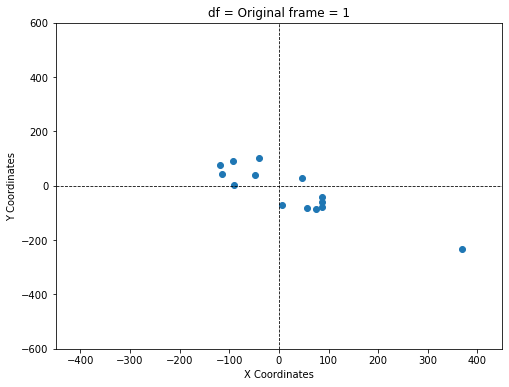

In [196]:
frame =1
r = mdp_df.iloc[frame, 1:-1:3]
theta = mdp_df.iloc[frame, 2:-1:3]
x_coord = r * [math.cos(t) for t in theta]
y_coord = r * [math.sin(t) for t in theta]
plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.show()

Automatized Dataset Creation for all Mice

In [ ]:
# @title Downsampler(filename, percentage_to_keep=1,isRandom=0, displayed=0)
def Downsampler(filename, percentage_to_keep= 1 ,isRandom=0, displayed=0):
  df = pd.read_csv(filename,header=[1,2])

  if isRandom == 0: #Not Random
    num_rows_to_keep = math.ceil(len(df) * percentage_to_keep)
    downsampled_df = df.iloc[:num_rows_to_keep]
  else: #Random
    downsampled_df = df.sample(frac=percentage_to_keep, random_state=42)


  new_columns = ['frame_number']
  for column in downsampled_df.columns[1:]:
      new_column = column
      new_columns.append(new_column)

  downsampled_df.columns = new_columns
  if displayed==1:
    display(downsampled_df)
  return downsampled_df


In [ ]:
# @title Transformer(filenameORdf, filename, df)
def Transformer(df, displayed=0):
  
  data = df.iloc[:, 1:]
  data = data.astype(float)

  # Extract the x, y coordinates for S1
  s1_x = data.iloc[:,39]
  s1_y = data.iloc[:,40]

  # Initialize new DataFrame for storing transformed coordinates
  transformed_data = pd.DataFrame()

  for column_index in range(0, len(data.columns), 3):
    column = data.columns[column_index]
    # Extract the x, y coordinates and likelihood for the current body part
    x = data[column]
    y = data[data.columns[column_index+1]]

    # Compute the transformed coordinates relative to S1
    transformed_x = x - s1_x
    transformed_y = y - s1_y

    # Add the transformed coordinates and likelihood to the new DataFrame
    transformed_data[column] = transformed_x
    transformed_data[data.columns[column_index+1]] = transformed_y
    transformed_data[data.columns[column_index+2]] = data[data.columns[column_index+2]]

  transformed_data.iloc[:,39]=s1_x
  transformed_data.iloc[:,40]=s1_y
  transformed_data.insert(0, 'frame_number', df['frame_number'])

  if displayed==1:
    display(transformed_data)
  return transformed_data

In [ ]:
# @title PolarTransformer(df)
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def PolarTransformer(df, displayed=0):
  coordinates_columns = [col for col in df.columns if col[1].endswith(('x', 'y'))]

  # Loop through each coordinate pair (x, y) and apply the rotation to remove orientation
  for col_x, col_y in zip(coordinates_columns[::2], coordinates_columns[1::2]):
    x, y = df[col_x], df[col_y]
    r, theta = cartesian_to_polar(x, y)
    df[col_x] = r
    df[col_y] = theta

  # Save the transformed data to a new file
  if displayed==1:
    display(df)
  return df

In [ ]:
# @title Rotator(df_cartesian,df_polar)
def Rotator(df_cartesian,df_polar, displayed=0):
  coordinates_columns = [col for col in df_cartesian.columns if col[1].endswith(('x', 'y'))]

  # Loop through each frame
  for frame_number, frame_data_polar in df_polar.groupby('frame_number'):
    # Find the 'S2' angle for the current frame
    rotation_angle = frame_data_polar.at[frame_data_polar.index[0], ('S2', 'y')]
    # Create the 2x2 affine transformation matrix
    affine_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                              [np.sin(rotation_angle), np.cos(rotation_angle)]])


    # Loop through each limb coordinate and apply the affine transformation
    for col_x, col_y in zip(coordinates_columns[::2], coordinates_columns[1::2]):
      x, y = df_cartesian[col_x], df_cartesian[col_y]
      # Convert the DataFrame column to a NumPy array for matrix multiplication
      points = np.column_stack((x, y))
      # Apply the affine transformation matrix to the points
      transformed_points = np.dot(points[frame_number], affine_matrix)
      # Update the DataFrame with the transformed coordinates
      df_cartesian.at[frame_number, col_x] = transformed_points[0]
      df_cartesian.at[frame_number, col_y] = transformed_points[1]
  if displayed==1:
    display(df_cartesian)
  return df_cartesian

In [ ]:
def Checker(dataframe,name,frame=1):

    if base_filename.split("_")[0] not in ["MouseDirectionalPolar","MouseCentricPolar"]:
        x_coord = dataframe.iloc[frame, 1:-1:3]
        y_coord = dataframe.iloc[frame, 2:-1:3]
    else:
        r = dataframe.iloc[frame, 1:-1:3]
        theta = dataframe.iloc[frame, 2:-1:3]
        x_coord = r * [math.cos(t) for t in theta]
        y_coord = r * [math.sin(t) for t in theta]

        
    plt.figure(figsize=(8,6))

    plt.scatter(x_coord, y_coord)
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.title(f'df={name} frame={frame}')
    plt.xlim(-450, 450)  # Set x-axis limits from 0 to 200
    plt.ylim(-600, 600)  # Set y-axis limits from 200 to 0
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    
    plt.show()



In [ ]:
# Create 5 dataset per mice
main_folder = "/Users/gamzekantar/Desktop/ELS_Gamze/v2/DLC_Data"
for file in os.listdir(main_folder):
    mouse=file.split("_")[1]+"."+file.split("_")[2][0:-3]
    path=f"DatasetsPerMice/{mouse}"
    if not os.path.exists(path):
        os.makedirs(path)
    file=os.path.join(main_folder, file)
    
    original_df = Downsampler(file)
    mousecentric_df = Transformer(original_df.copy())
    mousecentricpolar_df = PolarTransformer(mousecentric_df.copy())
    mousedirectional_df=Rotator(mousecentric_df.copy(),mousecentricpolar_df.copy())
    mousedirectionalpolar_df = PolarTransformer(mousedirectional_df.copy())
    
    original_df['mouse_no']=mouse
    mousecentric_df['mouse_no']=mouse
    mousecentricpolar_df['mouse_no']=mouse
    mousedirectional_df['mouse_no']=mouse    
    mousedirectionalpolar_df['mouse_no']=mouse

    original_df.to_csv(f'{path}/Original_data.csv', index=False)
    mousecentric_df.to_csv(f'{path}/MouseCentric_data.csv', index=False)
    mousecentricpolar_df.to_csv(f'{path}/MouseCentricPolar_data.csv', index=False)
    mousedirectional_df.to_csv(f'{path}/MouseDirectional_data.csv', index=False)
    mousedirectionalpolar_df.to_csv(f'{path}/MouseDirectionalPolar_data.csv', index=False)
    

Combined 98 files for 'Original_data' (Total rows: 1102500)


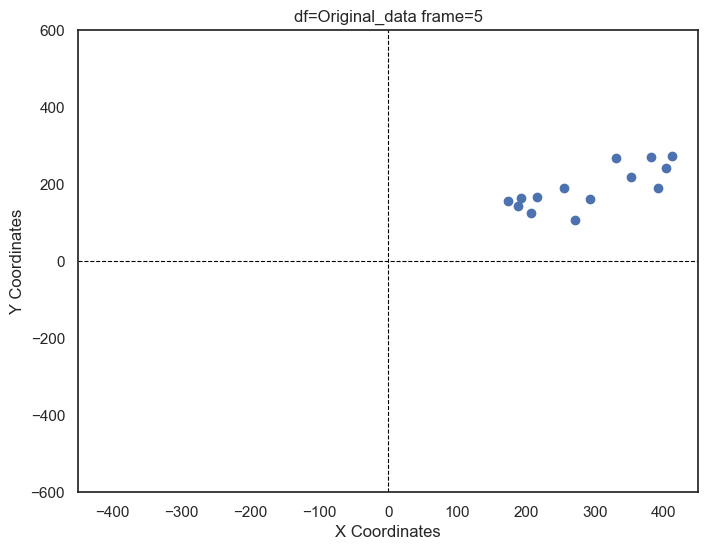

Combined 98 files for 'MouseCentric_data' (Total rows: 1102500)


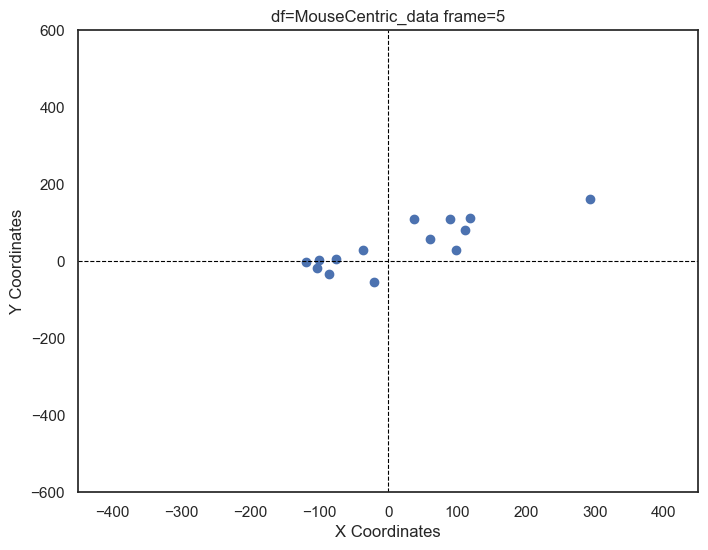

Combined 98 files for 'MouseDirectionalPolar_data' (Total rows: 1102500)


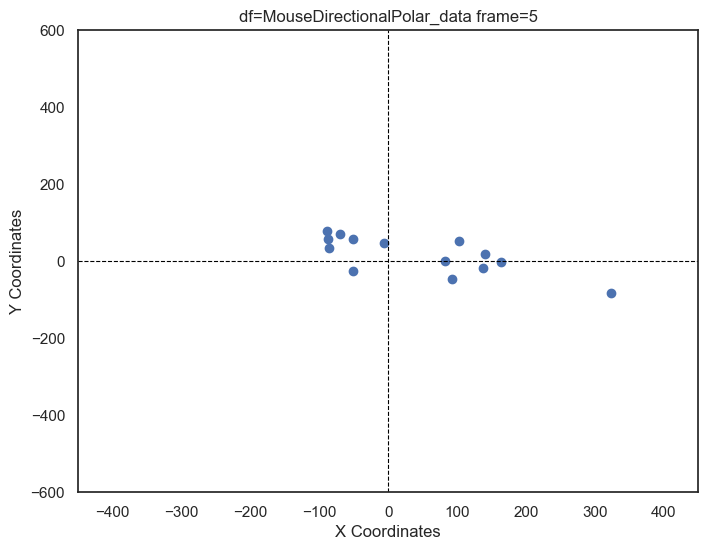

Combined 98 files for 'MouseCentricPolar_data' (Total rows: 1102500)


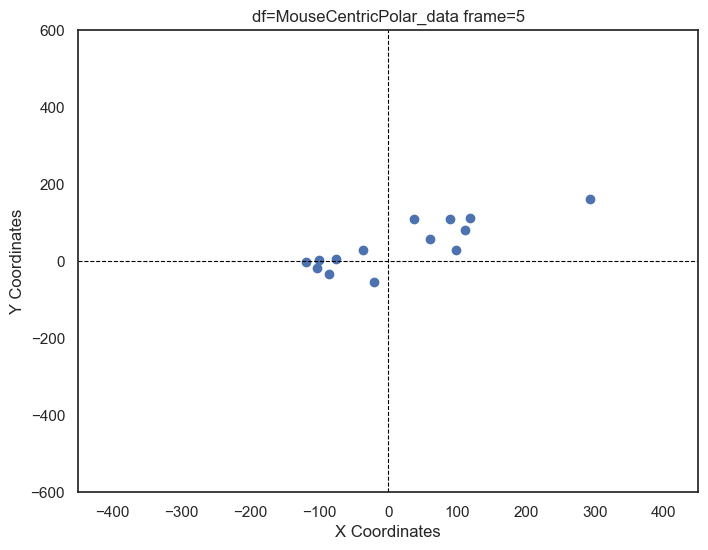

Combined 98 files for 'MouseDirectional_data' (Total rows: 1102500)


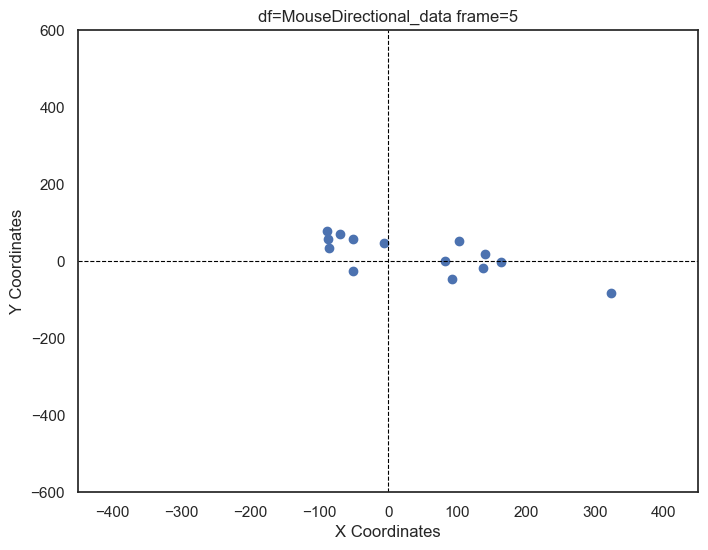

In [ ]:
main_folder = "/Users/gamzekantar/Desktop/ELS_Gamze/v2/DatasetsPerMice"
output_folder = "/Users/gamzekantar/Desktop/ELS_Gamze/v2/Datasets"

combined_data = {}
for foldername in os.listdir(main_folder):
    fullfoldername = os.path.join(main_folder, foldername)
    
    if os.path.isdir(fullfoldername):
        for filename in os.listdir(fullfoldername):
            filepath = os.path.join(fullfoldername, filename)
            
            if filename.endswith(".csv"):
                df = pd.read_csv(filepath)
                base_filename = filename.split(".")[0]  # Extract the base filename without extension
                
                if base_filename not in combined_data:
                    combined_data[base_filename] = []

                initial_rows = len(df)
                combined_data[base_filename].append((df, initial_rows))  # Store DataFrame and initial row count

for base_filename, data_list in combined_data.items():
    dfs = [data[0] for data in data_list]  # Extract DataFrames from the data list
    combined_df = pd.concat(dfs, ignore_index=True)

    # Print the row numbers of added files
    print(f"Combined {len(dfs)} files for '{base_filename}' (Total rows: {len(combined_df)})")

    Checker(combined_df,base_filename,5)

    # Save the combined DataFrame to a CSV file
    output_path = os.path.join(output_folder, f"{base_filename}.csv")
    combined_df.to_csv(output_path, index=False)
